# Biodiversity in National Parks

In this project, we will be examine data gathered from US National Parks. The goal is to find which parks contain the most diversity within.

We will answer the following questions:

* What is the distribution of conservation_status for species?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which species were spotted the most at each park?

The Data source was given to me from Codecademy for completion of the data analysis course. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

I have imported the required CSVs for the project then we will start to examine them in the next section.

In [20]:
species_data = pd.read_csv("species_info.csv",encoding='utf-8')
observation_data = pd.read_csv("observations.csv",encoding='utf-8')

## Examine Species Data

In this section, I have added lines to explore the data and to know what is contained in the Species Data.

In [22]:
print("Species")
print("Info")
print(species_data.info())
print("Describe")
print(species_data.describe())
print("NULL Values")
print(species_data.isnull().count())
print(species_data.head())

Species
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
Describe
              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  
NULL Values
category               5824
scientific_name     

## Examine Species Data

In this section, I have added lines to explore the data and to know what is contained in the Observation Data.

In [4]:
print("Observation")
print(observation_data.info())
print("Describe")
print(observation_data.describe(include='all'))


Observation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
Describe
         scientific_name                            park_name  observations
count              23296                                23296  23296.000000
unique              5541                                    4           NaN
top     Myotis lucifugus  Great Smoky Mountains National Park           NaN
freq                  12                                 5824           NaN
mean                 NaN                                  NaN    142.287904
std                  NaN                                  NaN     69.890532
min                  NaN                                 

## Clean Data Values

Out of 25632 entries, only 880 of the `conservation_status` entires do not contain a NULL value. The next step will change these NULL values into a `Not Threatened` value.

In [5]:
species_data = species_data.fillna(value={'conservation_status': 'Not Threatened'})
#print(species_data.head())

## What is the distribution of conservation_status for Species?

In this first question, we will explore which species have what type of conservation status. Anything `Not Threatened` will be excluded from the exploration since they do not contain a status.

### Create a table of aniamls

The first step is to cound how many category of species are in each conservation status. Looks at the table, we notice that "Species of Concern" contain the highest count of species.

In [6]:
conservation_status_count = species_data[species_data.conservation_status != "Not Threatened"].groupby(["conservation_status", "category"])['scientific_name'].count().unstack()
print(conservation_status_count)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


### Create a Bar Graph

The graph shows that `Species of Concern` contains more animals than the other three groups. Majority of the

Text(0.5, 1.0, 'Total Animals per Conservation Status')

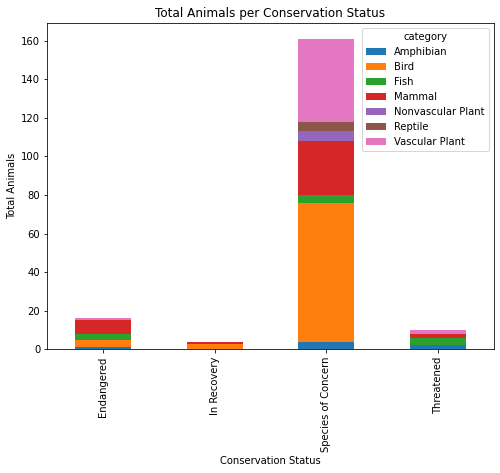

In [7]:
conservation_status_count.plot(kind='bar', figsize=(8,6), stacked=True)
plt.xlabel('Conservation Status')
plt.ylabel('Total Animals')
plt.title('Total Animals per Conservation Status')

## Are certain types of species more likely to be endangered?

## Which species were spotted the most at each park?

To answer this question, I wanted to know the max observations for each park. I created a simple loop to find the max observation for each park. I would use this data to confirm my findings. 

The next step would be to discover how to find the species for each park. After many trial and error with `groupby` function, I find my answer on [StackOverflow](https://stackoverflow.com/questions/49263437/how-to-get-value-of-a-column-based-on-the-maximum-of-another-column-in-case-of-d) using `df.loc` and `idxmax` functions. I sorted the answer from most observations to least to see which park had the most obersvations. 

In [16]:
park_names = observation_data['park_name'].unique()
for park_name in park_names:
    print(park_name, observation_data[observation_data['park_name'] == park_name]['observations'].max())

Great Smoky Mountains National Park 147
Yosemite National Park 223
Bryce National Park 176
Yellowstone National Park 321


In [19]:
cols = ['park_name']
most_spotted = observation_data.loc[observation_data.groupby(cols)['observations'].idxmax()]
print(most_spotted.sort_values(by=['observations'], ascending=False))

                       scientific_name                            park_name  \
11281           Lycopodium tristachyum            Yellowstone National Park   
6682   Ivesia shockleyi var. shockleyi               Yosemite National Park   
13138             Valerianella radiata                  Bryce National Park   
8840          Sonchus asper ssp. asper  Great Smoky Mountains National Park   

       observations  
11281           321  
6682            223  
13138           176  
8840            147  
